In [18]:
import skspatial
skspatial.__file__

'C:\\Users\\Mama\\anaconda3\\lib\\site-packages\\skspatial\\__init__.py'

(<Figure size 432x288 with 1 Axes>, <Axes3DSubplot:xlabel='x', ylabel='y'>)

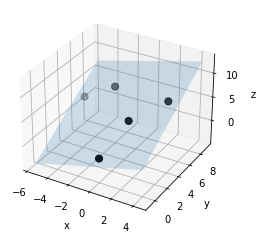

In [23]:
from skspatial.objects import Plane
from skspatial.objects import Points
from skspatial.plotting import plot_3d


points = Points([[0, 0, 0], [1, 3, 5], [-5, 6, 3], [3, 6, 7], [-2, 6, 7]])

plane = Plane.best_fit(points)


plot_3d(
    points.plotter(c='k', s=50, depthshade=True),
    plane.plotter(alpha=0.2, lims_x=(-5, 5), lims_y=(-5, 5)),
    set_label=True
)


Line(point=Point([0., 0., 0.]), direction=Vector([ 0, -1,  0]))


(<Figure size 432x288 with 1 Axes>, <Axes3DSubplot:xlabel='x', ylabel='y'>)

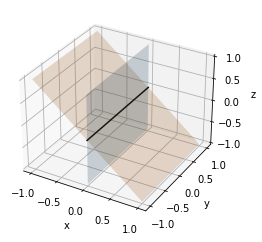

In [27]:
from skspatial.objects import Plane
from skspatial.plotting import plot_3d

plane_a = Plane([0, 0, 0], [1, 0, 0])
plane_b = Plane([0, 0, 0], [1, 0, 1])

line_intersection = plane_a.intersect_plane(plane_b)
print(line_intersection)

plot_3d(
    plane_a.plotter(alpha=0.2),
    plane_b.plotter(alpha=0.2),
    line_intersection.plotter(t_1=-1, c='k'),
    set_label=True
)

solution: 1.890441 x + 3.111282 y + 7.691654 = z
errors:
[[ 3.45564773]
 [-7.36816264]
 [ 7.46883311]
 [ 1.58127155]
 [-4.08463278]
 [-0.16274799]
 [ 2.95509949]
 [-1.47538645]
 [-1.80100864]
 [-0.56891337]]
residual: 12.478084561683211


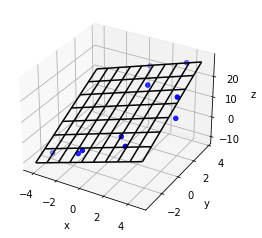

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

N_POINTS = 10
TARGET_X_SLOPE = 2
TARGET_y_SLOPE = 3
TARGET_OFFSET  = 5
EXTENTS = 5
NOISE = 5

# create random data
xs = [np.random.uniform(2*EXTENTS)-EXTENTS for i in range(N_POINTS)]
ys = [np.random.uniform(2*EXTENTS)-EXTENTS for i in range(N_POINTS)]
zs = []
for i in range(N_POINTS):
    zs.append(xs[i]*TARGET_X_SLOPE + \
              ys[i]*TARGET_y_SLOPE + \
              TARGET_OFFSET + np.random.normal(scale=NOISE))

# plot raw data
plt.figure()
ax = plt.subplot(111, projection='3d')
ax.scatter(xs, ys, zs, color='b')

# do fit
tmp_A = []
tmp_b = []
for i in range(len(xs)):
    tmp_A.append([xs[i], ys[i], 1])
    tmp_b.append(zs[i])
b = np.matrix(tmp_b).T
A = np.matrix(tmp_A)
fit = (A.T * A).I * A.T * b
errors = b - A * fit
residual = np.linalg.norm(errors)

print("solution: %f x + %f y + %f = z" % (fit[0], fit[1], fit[2]))
print("errors:")
print(errors)
print("residual: {}".format(residual))

# plot plane
xlim = ax.get_xlim()
ylim = ax.get_ylim()
X,Y = np.meshgrid(np.arange(xlim[0], xlim[1]),
                  np.arange(ylim[0], ylim[1]))
Z = np.zeros(X.shape)
for r in range(X.shape[0]):
    for c in range(X.shape[1]):
        Z[r,c] = fit[0] * X[r,c] + fit[1] * Y[r,c] + fit[2]
ax.plot_wireframe(X,Y,Z, color='k')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()